<h1>Linear Regression - 1 Feature</h1>





First we import some basic packages

In [3]:
import pandas as pd
import numpy as np

Then we read in our data

In [19]:
df = pd.read_csv('sample_data/ex1data1.csv')
df.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


Lets have a quick peekfor missing values and the spread of each data point.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


In [21]:
df.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


Next we're going to quickly have a look at a scatterplot of the two variables to see if we can identify a linear relationship visually.

In [22]:
import matplotlib.pyplot as plt


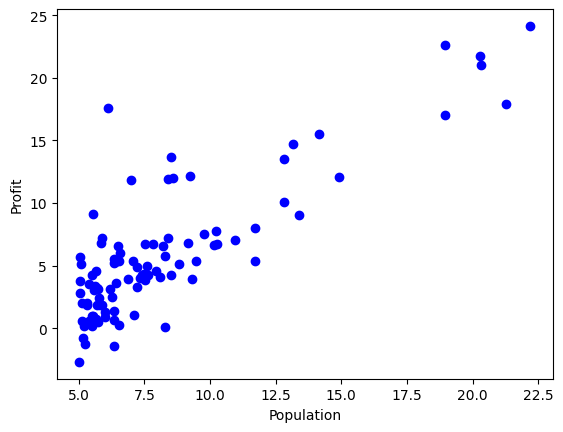

In [23]:
plt.scatter(df.Population, df.Profit,  color='blue')
plt.xlabel("Population")
plt.ylabel("Profit")
plt.show()

Based on the scatterplot it looks like there is a decent linear relationship with a some potential outliers (most notably 1 around profit level 17.5 and population level 6.25).  For now, we won't do any outlier removal.  Linear regression is sensitive to scale, but in this case the descriptive statistics show us the data is already been place on similar scale so we'll move on to splitting into test/train.

In [25]:
y = np.array(df.Profit)
X= np.array(df.drop(columns=['Profit']))

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=125
)

Now we can fit the model

In [27]:
from sklearn.linear_model import LinearRegression

# Build a Linear Regression
model = LinearRegression()

# Model training
model.fit(X_train, y_train)

LinearRegression()

Sklearn uses the coefficient of determination or r-squared as its model score.  R-squared is measure of how much of the variation in the dependent variable is explained by the independent variable(s).

In [28]:
print(model.score(X_test, y_test))

0.8117066136329999


The R-squared returns a value between 0 and 1 so at .81 our model explains a good deal of the variation in profit just vis a vis population.  Lets look at our prediction line vs. the ground truth of the test values.

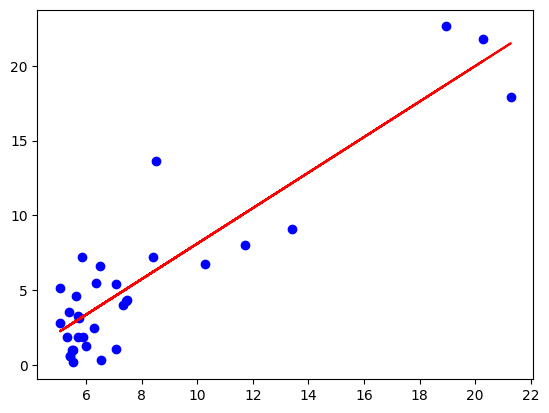

In [32]:
y_pred = model.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='r')

plt.show()

This model isn't causal. For the purposes of the problem stated in which the model was intended to be used to select the next city to expand to we couldnt say that larger population directly causes larger profits, but simply that there is a strong positive relationship observed between increasess in profits and increases in population size.